## 餐厅订单数据分析

'''

分析可得信息

1.订单表的长度，shape，columns

2.统计菜品的平均价格（amounts）

3.什么菜最受欢迎

4.哪个订单ID点的菜最多

......

~~加载数据~~

~~数据预处理（合并数据，NA处理），分析数据~~

~~统计8月卖出菜品的平均价格~~

~~频数统计，什么菜最受欢迎 （对菜名进行频数统计，取最大前10名）~~

~~数据可视化matplotlib~~

~~订单点菜的种类最多~~

~~8月份餐厅订单点菜种类前10名，平均点菜25个菜品

~~订单ID点菜数量Top10(分组order_id,counts求和，排序，前10)~~

~~8月份订单点菜数量前10名~~

~~哪个订单ID吃的钱做多~~

~~哪个订单ID平均消费最贵~~

~~一天当中什么时间段，点菜量比较集中（hour）~~

~~8月份哪一天订餐数量最多~~

~~拓展：排序，取点菜量最大的前5天(Done)~~

查看星期几人数最多，订餐数最多，映射数据到星期

'''

不同维度进行数据分析：

针对订单order_id：

        什么菜最受欢迎

        点菜的种类

        点菜的数量

        消费金额最大

        平均消费

针对时间日期进行分析：

        点菜量比较集中的时间

        哪一天订餐数量最大

        星期几就餐人数最多

技术点：

        拼接数据：pd.concat([列1,...])

        分组统计(求和)

        排序，切片Top10

        绘制柱状图走势和高度

'''



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [9]:
# 加载数据
data1 = pd.read_excel(r'C:\Users\wdl\Data-analysis\五大实战项目\data\meal_order_detail.xlsx', sheet_name=0)
data2 = pd.read_excel(r'C:\Users\wdl\Data-analysis\五大实战项目\data\meal_order_detail.xlsx', sheet_name=1)
data3 = pd.read_excel(r'C:\Users\wdl\Data-analysis\五大实战项目\data\meal_order_detail.xlsx', sheet_name=2)

In [10]:
# 数据预处理（合并数据，NA处理），分析数据
data = pd.concat([data1, data2, data3], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   detail_id          10037 non-null  int64         
 1   order_id           10037 non-null  int64         
 2   dishes_id          10037 non-null  int64         
 3   logicprn_name      0 non-null      float64       
 4   parent_class_name  0 non-null      float64       
 5   dishes_name        10037 non-null  object        
 6   itemis_add         10037 non-null  int64         
 7   counts             10037 non-null  int64         
 8   amounts            10037 non-null  int64         
 9   cost               0 non-null      float64       
 10  place_order_time   10037 non-null  datetime64[ns]
 11  discount_amt       0 non-null      float64       
 12  discount_reason    0 non-null      float64       
 13  kick_back          0 non-null      float64       
 14  add_inp

In [11]:
data.dropna(axis=1, how='any', inplace=True)
data.head(5)

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442


In [94]:
# 统计8月卖出菜品的平均价格
np.round(data.amounts.mean(), 1)

44.8

In [13]:
# 删除series的字符
data.dishes_name = data.dishes_name.str.replace(r'_x000D_\n', '', regex=True)
data.dishes_name.value_counts()

白饭/大碗         323
凉拌菠菜          269
谷稻小庄          239
麻辣小龙虾         216
辣炒鱿鱼          189
             ... 
特醇嘉士伯啤酒罐装      13
鸡蛋、肉末肠粉        12
三丝鳝鱼           10
百里香奶油烤紅酒牛肉      5
铁板牛肉            3
Name: dishes_name, Length: 145, dtype: int64

In [14]:
new_data = data.drop(data[(data.dishes_name=='白饭/大碗') | (data.dishes_name=='白饭/小碗')].index)
new_data.dishes_name.value_counts()

凉拌菠菜          245
谷稻小庄          218
麻辣小龙虾         198
五色糯米饭(七色)     175
芝士烩波士顿龙虾      171
             ... 
鸡蛋、肉末肠粉        11
特醇嘉士伯啤酒罐装      11
三丝鳝鱼            9
百里香奶油烤紅酒牛肉      5
铁板牛肉            3
Name: dishes_name, Length: 143, dtype: int64

In [15]:
# 频数统计，什么菜最受欢迎 （对菜名进行频数统计，取最大前10名）
ser1 = new_data.dishes_name.value_counts().nlargest(10)
ser1

凉拌菠菜         245
谷稻小庄         218
麻辣小龙虾        198
五色糯米饭(七色)    175
芝士烩波士顿龙虾     171
辣炒鱿鱼         168
香酥两吃大虾       165
焖猪手          159
水煮鱼          148
蒙古烤羊腿        140
Name: dishes_name, dtype: int64

In [177]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Line

bar = Bar(init_opts=opts.InitOpts(theme='romantic'))
bar.add_xaxis(ser1.index.to_list())
bar.add_yaxis(
    "销量", ser1.values.tolist(), bar_max_width=30, category_gap='50%',
    itemstyle_opts=opts.ItemStyleOpts(
        color='RGB(252,107,5)', border_color='rgba(255, 0, 0, 0.5)', border_width=1, opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
)
bar.set_global_opts(
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15, position='bottom', interval=0, font_size=12, margin=20, horizontal_align='center'),
                             name_location='middle', name_gap=50, name='菜名'),
    title_opts=opts.TitleOpts(title="最受欢迎的10个菜"),
    toolbox_opts=opts.ToolboxOpts(
        is_show=True, orient='vertical', pos_left='right', pos_top='center'),
    visualmap_opts=opts.VisualMapOpts(is_show=True, type_='color', min_=100, max_=300, range_color=['#d94e5d', '#eac736', '#50a3ba']),
)

line = Line(init_opts=opts.InitOpts(theme='dark'))
line.add_xaxis(ser1.index.to_list())
line.add_yaxis("销量", ser1.values.tolist(), is_smooth=True, is_symbol_show=True, symbol='circle',
               symbol_size=6, linestyle_opts=opts.LineStyleOpts(width=3, type_='dashed'),
               )


bar.overlap(line).render_notebook()


In [142]:
from pyecharts.charts import Bar
from pyecharts.options import ItemStyleOpts

bar = Bar()
bar.add_xaxis(["A", "B", "C"])
bar.add_yaxis("Series1", [1, 2, 3], itemstyle_opts=ItemStyleOpts(color=["red", "blue", "green"]))
bar.render_notebook()


In [136]:
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Bar
from pyecharts.options import InitOpts, TitleOpts, AxisOpts
from pyecharts.colors import Color

# 创建颜色列表
colors = ['#5793f3', '#d14a61', '#675bba', '#14b143']

# 创建 Bar 对象并添加数据
bar = (
    Bar(init_opts=InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(['A', 'B', 'C', 'D'])
    .add_yaxis('Series', [1, 3, 2, 4])
)

# 设置每个 bar 的颜色
bar.set_series_opts(
    itemstyle_opts={
        "normal": {
            "color": JsCode(
                """
                function(params) {
                    var colorList = %s;
                    return colorList[params.dataIndex]
                }
                """ % colors
            )
        }
    }
)

# 渲染图表
bar.render_notebook()

ModuleNotFoundError: No module named 'pyecharts.colors'

In [111]:
# pyecharts词云图
from pyecharts.charts import WordCloud

wordcloud = WordCloud(init_opts=opts.InitOpts(theme='dark'))
wordcloud.add("欢迎", [list(z) for z in zip(ser1.index.to_list(), ser1.values.tolist())],
                word_size_range=[20, 100], shape='diamond')
wordcloud.set_global_opts(title_opts=opts.TitleOpts(title="最受欢迎的10个菜"),
                          toolbox_opts=opts.ToolboxOpts(is_show=True, orient='vertical', pos_left='right', pos_top='center'),
                          )

wordcloud.render_notebook()

In [18]:
# 订单点菜的种类最多
new_data.order_id.value_counts()[:10]

398     34
1078    25
582     25
392     24
1295    24
1311    23
465     23
1318    23
672     23
1166    22
Name: order_id, dtype: int64

In [19]:
# 平均点菜25个菜品
np.round(new_data.order_id.value_counts()[:10].mean(), 0)

25.0

In [20]:
# 订单ID点菜数量Top10
new_data.groupby('order_id').counts.sum().nlargest(10)

order_id
398     34
1051    33
1033    30
1318    30
1150    28
752     27
1078    27
1186    27
557     26
1019    26
Name: counts, dtype: int64

In [21]:
# 哪个订单ID吃的钱做多
data.groupby('order_id').amounts.sum().nlargest(10)

order_id
1166    1314
743     1214
1317    1210
576     1162
408     1148
1121    1146
561     1144
1178    1129
385     1125
584     1121
Name: amounts, dtype: int64

In [22]:
# 哪个订单ID平均消费最贵
data.groupby('order_id').amounts.mean().nlargest(1)

order_id
909    117.75
Name: amounts, dtype: float64

In [23]:
data['hour'] = data.place_order_time.dt.hour

In [24]:
hour_data = data.groupby('hour').counts.sum()
hour_data

hour
11    1022
12     915
13     888
14     140
17    1231
18    1726
19    1619
20    1709
21    1662
22     214
Name: counts, dtype: int64

In [25]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Line


bar = Bar(init_opts=opts.InitOpts(theme='dark'))
bar.add_xaxis([f'{i}点' for i in hour_data.index.to_list()])
bar.add_yaxis("点菜金额",
              hour_data.values.tolist(),
              label_opts=opts.LabelOpts(is_show=False),
              bar_max_width=30, category_gap='50%',
              markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average", name="平均值")])
              )
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="一天中什么时间段，点菜金额"),
    datazoom_opts=[opts.DataZoomOpts(range_start=0, range_end=100,
                                     is_show=True, type_="slider",
                                     pos_bottom="7%", pos_top="96%")
                   ])


line = Line(init_opts=opts.InitOpts(theme='dark'))
line.add_xaxis(xaxis_data=[f'{i}点' for i in hour_data.index.to_list()])
line.add_yaxis(
    series_name="",
    y_axis=hour_data.values.tolist(),
)

bar.overlap(line).render_notebook()


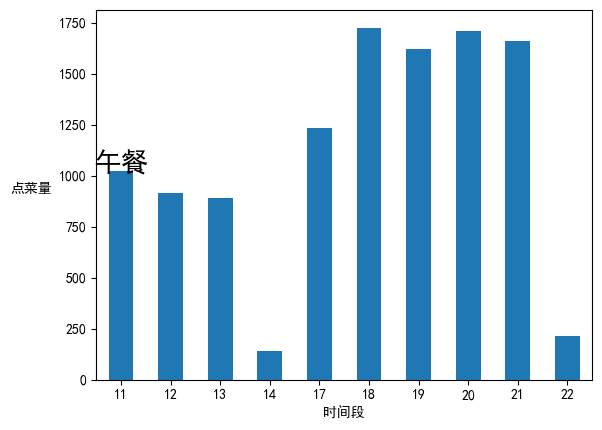

In [26]:
# 一天当中什么时间段，点菜量比较集中（hour）
data.groupby('hour').counts.sum().plot(kind='bar')
plt.text(0, 1000, '午餐', ha='center', va='bottom', fontsize=20)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('时间段')
ax.set_ylabel('点菜量', rotation=0, labelpad=20) # labelpad=20 用来调整label与轴的距离

plt.show()

In [27]:
data['day'] = data.place_order_time.dt.day

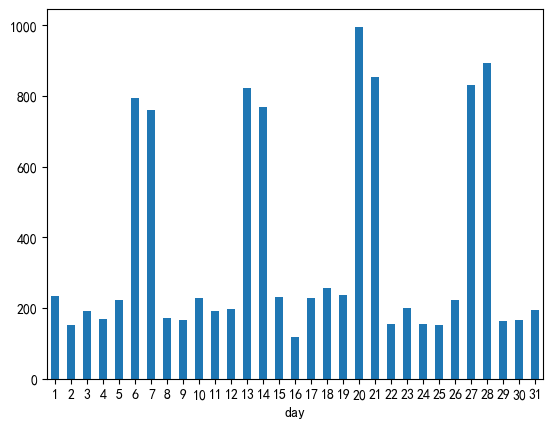

In [28]:
# 8月份哪一天订餐数量最多
data.groupby('day').counts.sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [29]:
# 排序，取点菜量最大的前5天
data.groupby('day').counts.sum().nlargest(5)

day
20    996
28    892
21    853
27    831
13    824
Name: counts, dtype: int64

In [30]:
data['day_of_week'] = data.place_order_time.dt.dayofweek + 1

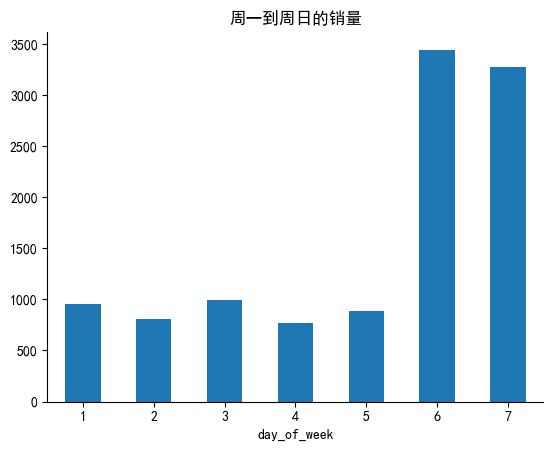

In [31]:
data.groupby('day_of_week').counts.sum().plot(kind='bar')
plt.xticks(rotation=0)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('周一到周日的销量')
plt.show()
# 显示柱状总计数
